In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [2]:
main="/mnt/lab_data2/anusri/chrombpnet/"
#atac_chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/uncorrected_model_05.10.2022/uncorrected_model/all_motifs_footprints/motif_footprints.h5"
atac_chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/uncorrected_model/footprints_motifs_uncorrected/footprints_footprints.h5"

main="/mnt/lab_data2/anusri/chrombpnet/"
#dnase_chrombpnet_uncorrected1=main+"results/chrombpnet/DNASE_SE/K562/uncorrected_model_05.10.2022/uncorrected_model/footprints/corrected_footprints.h5"
dnase_chrombpnet_uncorrected1=main+"results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/uncorrected_model/footprints_motifs_uncorrected/footprints_footprints.h5"



In [3]:
import deepdish
import numpy as np

In [4]:
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))
        #input_f[key][0] = input_f[key][0]

        print(input_f[key][1], input_f["control"][1])
    return input_f

In [5]:
#uncorrected = normalize_marginal_footprints(deepdish.io.load(chrombpnet_uncorrected1))
atac_uncorrected = deepdish.io.load(atac_chrombpnet_uncorrected1)
dnase_uncorrected = deepdish.io.load(dnase_chrombpnet_uncorrected1)


In [6]:
atac_uncorrected.keys()

dict_keys(['DNASE_1', 'DNASE_2', 'DNASE_3', 'Tn5_1', 'Tn5_2', 'Tn5_3', 'Tn5_4', 'Tn5_5', 'control'])

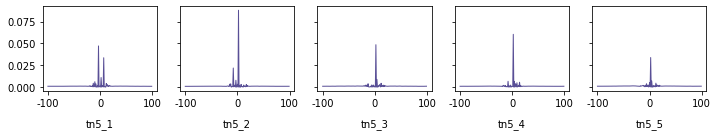

In [7]:
fig,axs = plt.subplots(1,5,figsize=(10,2),sharex=True,sharey=True)
plt.style.use('default')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

keyd="tn5"
keyd="K562_BIAS_metacluster_0_pattern"
keyd="Tn5"

for i in range(1,6):
    axs[i-1].plot(atac_uncorrected[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    plt.locator_params(axis='x', nbins=3)

motifs = ["tn5_1", "tn5_2", "tn5_3", "tn5_4", "tn5_5"]

for ax, row in zip(axs[0:], motifs):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=10)
    ax.set_xticks([0,100,200])
    ax.set_xticklabels(["-100","0","100"])


plt.savefig("subfigs/performance_plots/tn5_response_plots.pdf", transparent=True, dpi=300)
fig.tight_layout()

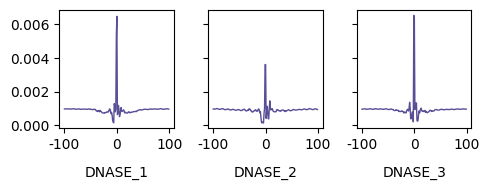

In [8]:
fig,axs = plt.subplots(1,3,figsize=(5,2),sharex=True,sharey=True)
plt.style.use('default')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

keyd="DNASE"
for i in range(0,3):
    axs[i-1].plot(dnase_uncorrected[keyd+"_"+str(i+1)][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    plt.locator_params(axis='x', nbins=3)

motifs = ["DNASE_1", "DNASE_2", "DNASE_3"]
for ax, row in zip(axs[0:], motifs):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=10)
    ax.set_xticks([0,100,200])
    ax.set_xticklabels(["-100","0","100"])

plt.savefig("subfigs/performance_plots/dnase_response_plots.pdf", transparent=True, dpi=300,bbox_inches="tight")
fig.tight_layout()